# Data Exploration

## Load

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [17]:
import numpy as np

X, y = mnist["data"].values, mnist["target"].values
y = y.astype(np.uint8)
X.shape, y.shape

((70000, 784), (70000,))

## Visualize

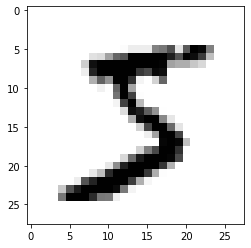

5

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt

sample_digit = X[0]
sample_digit_image = sample_digit.reshape(28, 28)
plt.imshow(
    sample_digit_image,
    cmap="binary",
)
plt.show()

# Data Training

## Train Test Split

In [18]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [19]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits
y_test_5 = (y_test == 5) # True for all 5s, False for all other digits
y_train_5.shape, y_test_5.shape

((60000,), (10000,))

## Modeling

In [21]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, verbose=1)
sgd_clf.fit(X_train, y_train_5)

-- Epoch 1
Norm: 8147.16, NNZs: 624, Bias: 12.352211, T: 60000, Avg. loss: 96002.101183
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 4850.19, NNZs: 630, Bias: 21.765171, T: 120000, Avg. loss: 13448.913390
Total training time: 0.17 seconds.
-- Epoch 3
Norm: 3609.24, NNZs: 639, Bias: 26.212700, T: 180000, Avg. loss: 7640.779336
Total training time: 0.25 seconds.
-- Epoch 4
Norm: 2958.05, NNZs: 642, Bias: 29.904666, T: 240000, Avg. loss: 5411.680114
Total training time: 0.33 seconds.
-- Epoch 5
Norm: 2535.62, NNZs: 643, Bias: 32.474667, T: 300000, Avg. loss: 4222.549757
Total training time: 0.40 seconds.
-- Epoch 6
Norm: 2202.83, NNZs: 646, Bias: 34.517745, T: 360000, Avg. loss: 3421.870201
Total training time: 0.48 seconds.
-- Epoch 7
Norm: 1972.29, NNZs: 647, Bias: 36.129522, T: 420000, Avg. loss: 2905.781392
Total training time: 0.56 seconds.
-- Epoch 8
Norm: 1801.26, NNZs: 649, Bias: 37.668583, T: 480000, Avg. loss: 2539.335154
Total training time: 0.64 seconds.
-- Epoch 9
Norm

SGDClassifier(random_state=42, verbose=1)

In [22]:
sgd_clf.predict([X[0]])

array([ True])

# Evaluation

## Cross Validation

In [23]:
from sklearn.model_selection import cross_val_score

cross_val_score(
    sgd_clf,
    X_train,
    y_train_5,
    cv=3,
    scoring="accuracy",
)

-- Epoch 1
Norm: 10699.90, NNZs: 626, Bias: 6.879106, T: 40000, Avg. loss: 131942.802374
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 6389.14, NNZs: 633, Bias: 15.332532, T: 80000, Avg. loss: 21113.183759
Total training time: 0.09 seconds.
-- Epoch 3
Norm: 4724.99, NNZs: 643, Bias: 19.900779, T: 120000, Avg. loss: 12323.897952
Total training time: 0.15 seconds.
-- Epoch 4
Norm: 3932.54, NNZs: 643, Bias: 22.493964, T: 160000, Avg. loss: 8402.601105
Total training time: 0.23 seconds.
-- Epoch 5
Norm: 3351.57, NNZs: 645, Bias: 25.325003, T: 200000, Avg. loss: 6536.952358
Total training time: 0.28 seconds.
-- Epoch 6
Norm: 2999.56, NNZs: 645, Bias: 27.709423, T: 240000, Avg. loss: 5420.110699
Total training time: 0.32 seconds.
-- Epoch 7
Norm: 2682.53, NNZs: 645, Bias: 30.219059, T: 280000, Avg. loss: 4519.289343
Total training time: 0.37 seconds.
-- Epoch 8
Norm: 2469.50, NNZs: 647, Bias: 31.662522, T: 320000, Avg. loss: 3826.925667
Total training time: 0.42 seconds.
-- Epoch 9
Nor

array([0.95035, 0.96035, 0.9604 ])

This is simply because only about 10% of the images are 5s, so if you always guess that an image is not a 5, you will be right about 90% of the time. Beats Nostradamus

## Confusion Matrix

In [24]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(
    sgd_clf,
    X_train,
    y_train_5,
    cv=3,
)

-- Epoch 1
Norm: 10699.90, NNZs: 626, Bias: 6.879106, T: 40000, Avg. loss: 131942.802374
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 6389.14, NNZs: 633, Bias: 15.332532, T: 80000, Avg. loss: 21113.183759
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 4724.99, NNZs: 643, Bias: 19.900779, T: 120000, Avg. loss: 12323.897952
Total training time: 0.15 seconds.
-- Epoch 4
Norm: 3932.54, NNZs: 643, Bias: 22.493964, T: 160000, Avg. loss: 8402.601105
Total training time: 0.20 seconds.
-- Epoch 5
Norm: 3351.57, NNZs: 645, Bias: 25.325003, T: 200000, Avg. loss: 6536.952358
Total training time: 0.25 seconds.
-- Epoch 6
Norm: 2999.56, NNZs: 645, Bias: 27.709423, T: 240000, Avg. loss: 5420.110699
Total training time: 0.30 seconds.
-- Epoch 7
Norm: 2682.53, NNZs: 645, Bias: 30.219059, T: 280000, Avg. loss: 4519.289343
Total training time: 0.35 seconds.
-- Epoch 8
Norm: 2469.50, NNZs: 647, Bias: 31.662522, T: 320000, Avg. loss: 3826.925667
Total training time: 0.40 seconds.
-- Epoch 9
Nor

In [25]:
from sklearn.metrics import confusion_matrix

confusion_matrix(
    y_train_5,
    y_train_pred,
)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)